In [10]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob, os, sys
import utils
import plotting
from importlib import reload
reload(utils)
reload(plotting)

%matplotlib inline

In [3]:
folder = '/home/jesse/Development/data/weather'
files = glob.glob(os.path.join(folder, '*.csv'))
kwargs = {'t_range': [-20, 120]}

In [31]:
data = [pd.read_csv(f, low_memory=False) for f in files]
data = pd.concat(data)
df, stations = utils.preprocess(data, **kwargs)
stations = [st for st in stations if 'DIEGO' not in st]
print(stations)

['DETROIT METROPOLITAN AIRPORT MI US', 'ITHACA CORNELL UNIVERSITY NY US', 'OAKLAND METROPOLITAN INTERNATIONAL AIRPORT CA US', 'SAN FRANCISCO DOWNTOWN CA US', 'SAN JOSE CA US']


/home/jesse/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


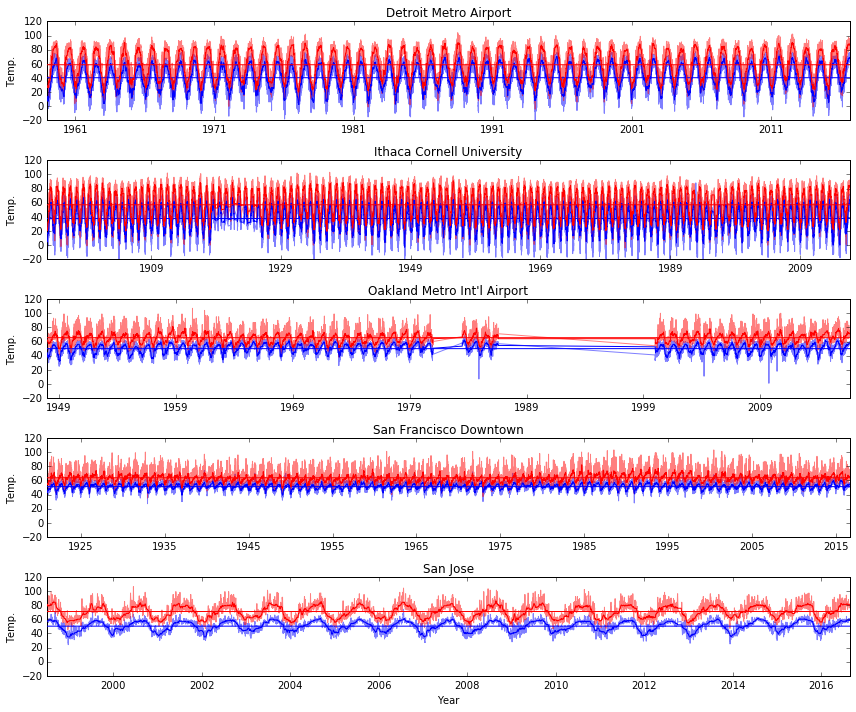

In [32]:
f = plotting.plot_stations_all_time(df, stations, **kwargs)
plt.savefig('alltime.png')
plt.show()
plt.close()

/home/jesse/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


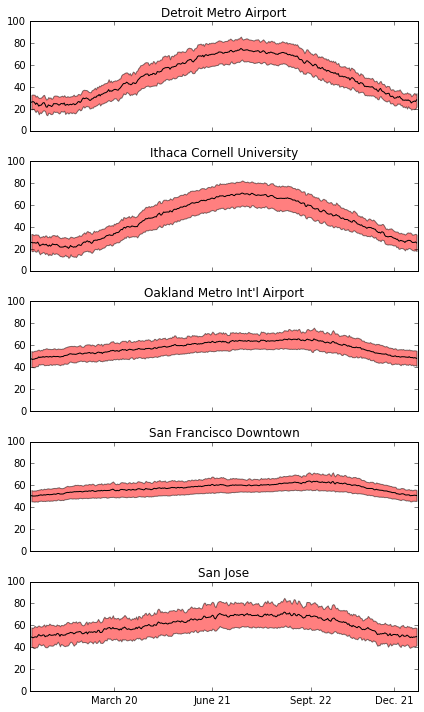

In [33]:
f = plotting.plot_annual_temperature(df, stations)
plt.savefig('annual.png')
plt.show()
plt.close()

/home/jesse/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


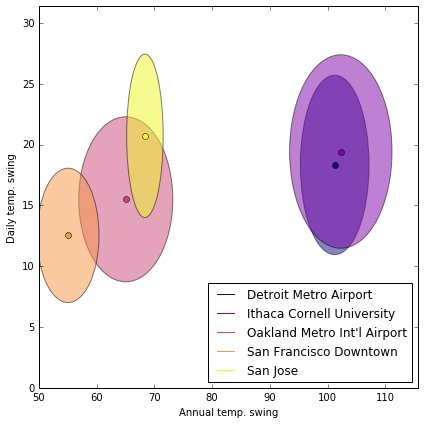

In [34]:
reload(utils)
reload(plotting)
f = plotting.plot_annual_daily_comparison(df, stations)
plt.savefig('annual_daily.png')
plt.show()
plt.close()

/home/jesse/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


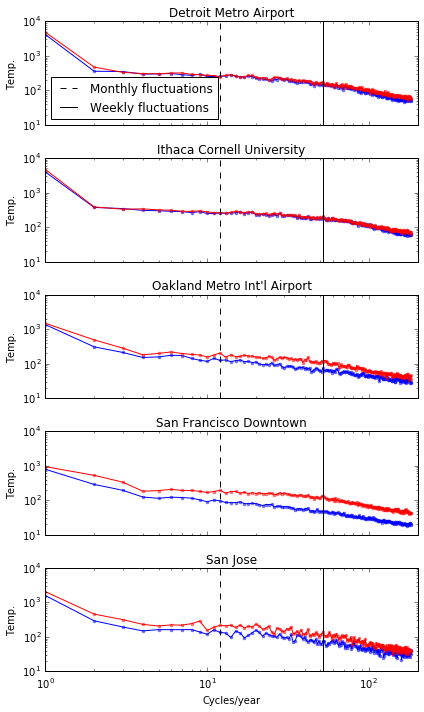

In [38]:
reload(utils)
reload(plotting)
f = plotting.plot_annual_power_spectrum(df, stations)
plt.show()
plt.close()